Faster RCNN

input image --> Vgg16(pretrained model) it will give feature map that is passed
 to RPN ----> This RPN for each feature map it will generate anchor boxes and cnn is performed on that anchor boxes --> it will produce 2 things
1. Regressor (4 Coordinates with 9 anchor boxes)
2. Binary classifiaction (whether the obj is there or not or  the area of obj) (2x9)


ROI --> combination of feature map from vgg16 and output from RPN (ROI) it will convert them 7x7 feature map and 512 (no.of channels) flattened --> FCN 1 --> FCN2 --> Reg & classif

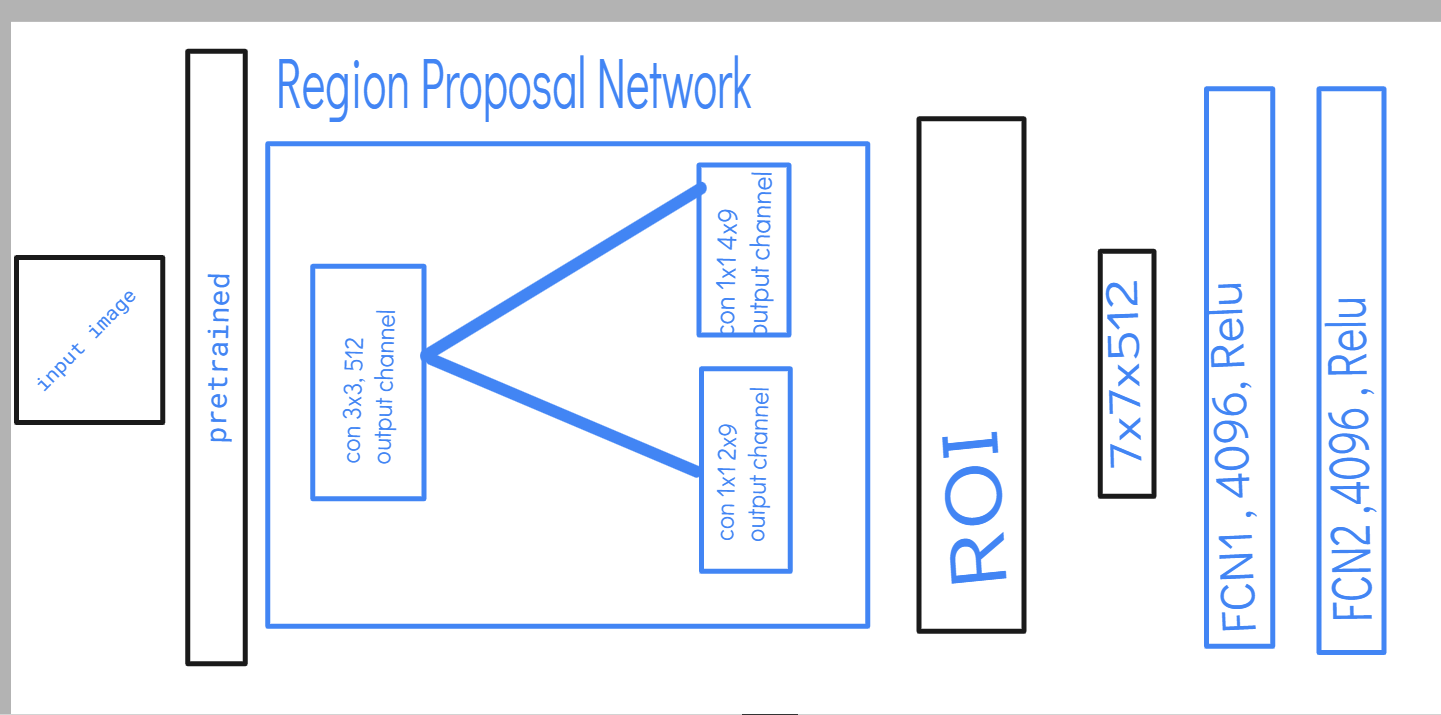

Mask RCNN

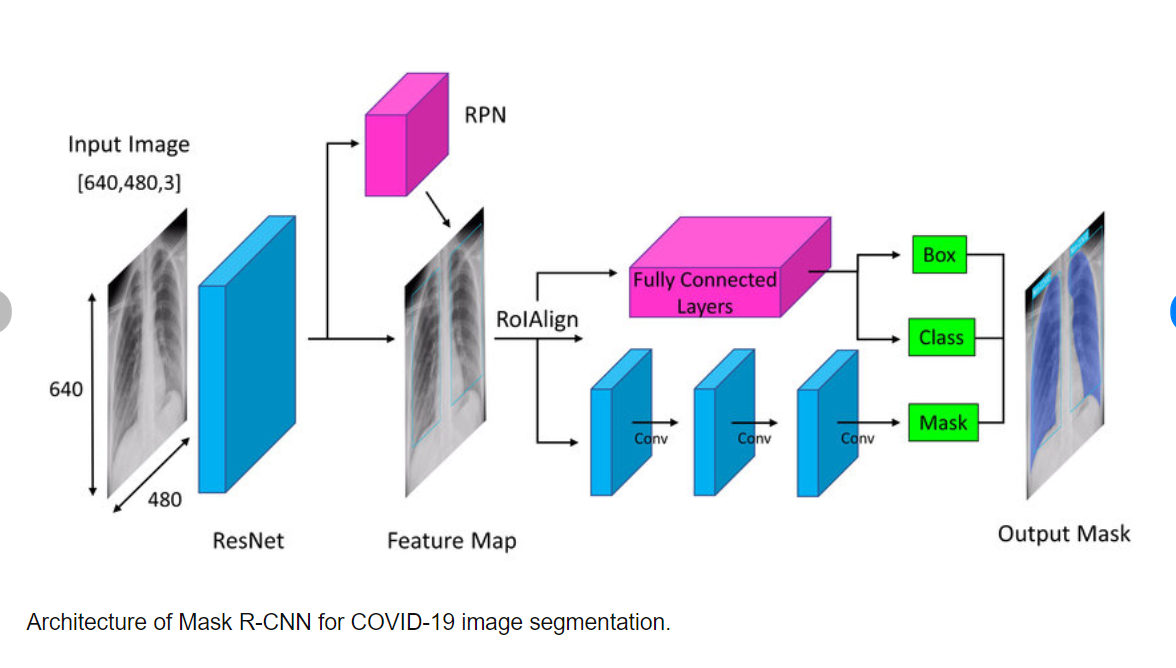

After the ROI pooling, we add 2 more convolution layers to build the mask.

Another major contribution of Mask R-CNN is the refinement of the ROI pooling. In ROI, the warping is digitalized the cell boundaries of the target feature map are forced to realign with the boundary of the input feature maps.


Therefore, each target cells may not be in the same size (bottom left diagram). Mask R-CNN uses ROI Align which does not digitalize the boundary of the cells (top right) and make every target cell to have the same size (bottom right). It also applies interpolation to calculate the feature map values within the cell better.

**YOLO**

Content :

1. What is YoLo?
2.Architecture of YoLov3?
3. Input
4. Detection at 3 scales
5. Detection Kernels
6. Grid Cells
7.Anchor boxes
8.Predicted bounding boxes
9. Objectness score
10.conclusion



YOLO ---> "You Only Look Once" uses Convolutional NN .

YOLO stands for You Only Look Once. YOLO algorithm divides an image into the grid system and in that each grid detects objects within itself. Now the latest version of YOLO is V7 which is launched by ultralytics.
This YOLO V7 algorithm is the best of all object detection algorithms available so far. It is simple, easier, and faster. It detects objects with high accuracy.
[visit here yolo documentation ](https://docs.ultralytics.com/)

yolo V3 can


Detect Multiple objects

It can predict classes

It can Identify locations

Applies Single NN

Divides image into grid cells

produces cells prob

predicts boxes




Terminology we Use in Yolo



CNNs

Residual Blocks

Skip connections

Up- Sampling

Leaky Relu

IoU

Non max supression

Yolo V3  Architecture

53 CNNs Layers (Darknet-53)

53 more layers producing

106 layers for yolo v3

First, YOLO v3 uses a variant of Darknet, which originally has 53 layer network trained on Imagenet. For the task of detection, 53 more layers are stacked onto it, giving us a 106 layer fully convolutional underlying architecture for YOLO v3. This is the reason behind the slowness of YOLO v3 compared to YOLO v2. Here is how the architecture of YOLO now looks like.

Darknet Framework
Loads 106 layers

it will give detections at
82 ,94,106 layers

In V3 no pooling layer but additional cnn layers added to down sample which prevents loss of low level features , So that it provides ability to detect small obj sa well

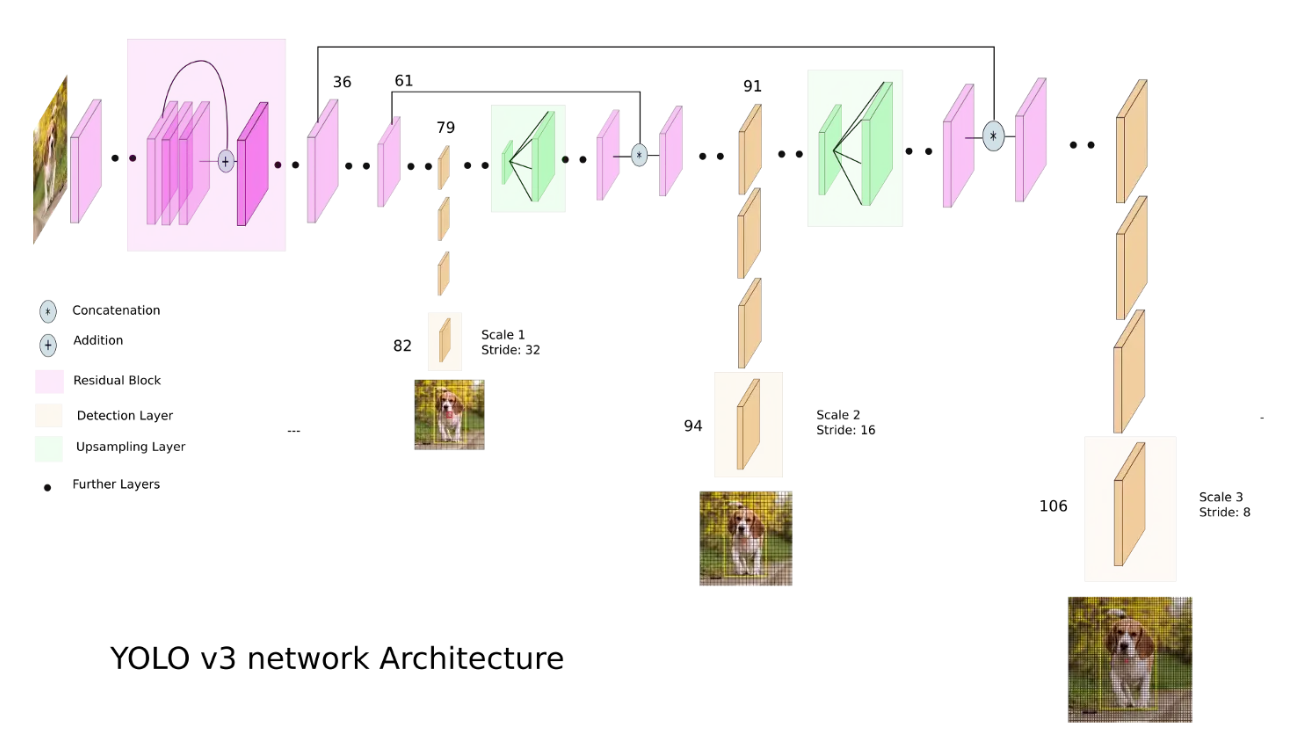

Network Input

batch of immages

(n, width, height , no of channels)

(n,416,416,3)


possible width and height values are

608, 608

832,832

1024,1024 divisible by 32


Input Images

can be of any size

will be resized to network size

```
# It will detect at 82,94,106
downsample the image at 32,16,8
```
Network strides
32 strides of 416,416  input image  size output will be 13x13 large ob

16_____________________________________________________26x26 med

8______________________________________________________52 x52 small

YOLO first takes an input image:


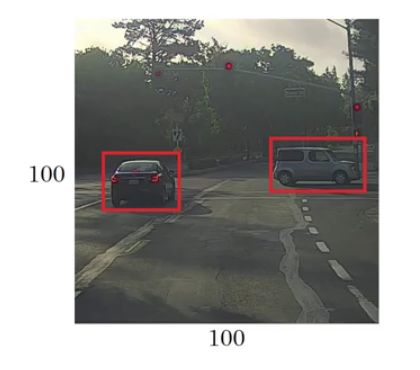

The framework then divides the input image into grids (say a 3 X 3 grid):

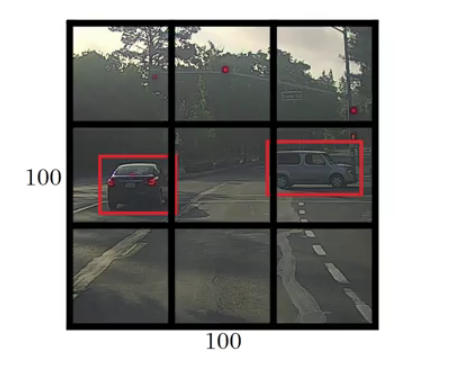

Image classification and localization are applied on each grid. YOLO then predicts the bounding boxes and their corresponding class probabilities for objects (if any are found in an image)

We need to pass the labelled data to the model in order to train it. Suppose we have divided the image into a grid of size 3 X 3 and there are a total of 3 classes which we want the objects to be classified into. Let’s say the classes are Pedestrian, Car, and Motorcycle respectively. So, for each grid cell, the label y will be an eight dimensional vector:

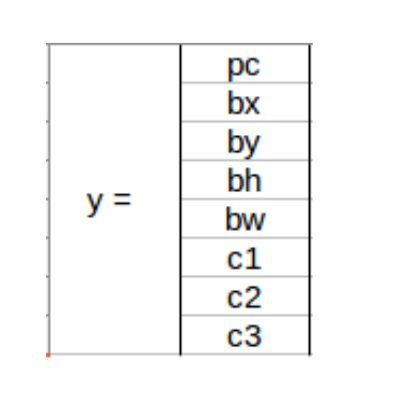

Here,



```
pc defines whether an object is present in the grid or not (it is the probability)
bx, by, bh, bw specify the bounding box if there is an object
c1, c2, c3 represent the classes. So, if the object is a car, c2 will be 1 and c1 & c3 will be 0, and so on

```


Let’s say we select the first grid from the above example:

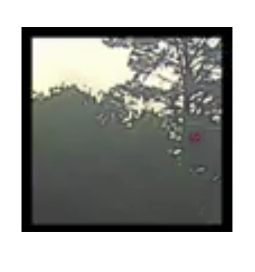

Since there is no object in this grid, pc will be zero and the y label for this grid will be:

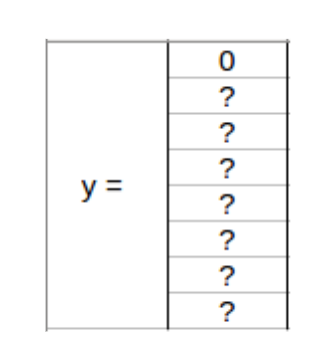

Here, ‘?’ means that it doesn’t matter what bx, by, bh, bw, c1, c2, and c3 contain as there is no object in the grid. Let’s take another grid in which we have a car (c2 = 1):

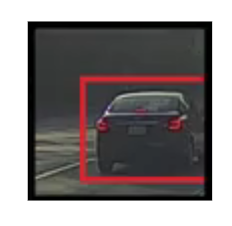

Before we write the y label for this grid, it’s important to first understand how YOLO decides whether there actually is an object in the grid. In the above image, there are two objects (two cars), so YOLO will take the mid-point of these two objects and these objects will be assigned to the grid which contains the mid-point of these objects. The y label for the centre left grid with the car will be:

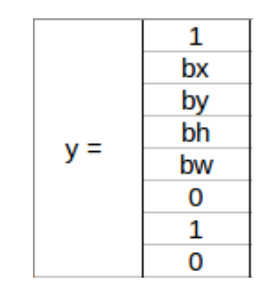

Since there is an object in this grid, pc will be equal to 1. bx, by, bh, bw will be calculated relative to the particular grid cell we are dealing with. Since car is the second class, c2 = 1 and c1 and c3 = 0. So, for each of the 9 grids, we will have an eight dimensional output vector. This output will have a shape of 3 X 3 X 8.

So now we have an input image and it’s corresponding target vector. Using the above example (input image – 100 X 100 X 3, output – 3 X 3 X 8), our model will be trained as follows:

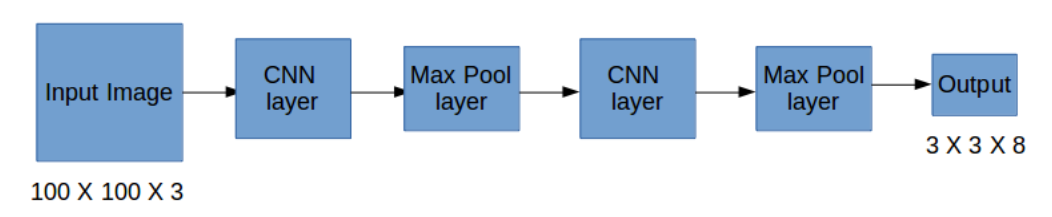

Encode Bounding Boxes

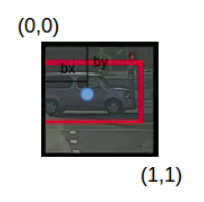

Consider the center-right grid which contains a car

pc = 1 since there is an object in this grid and since it is a car, c2 = 1.
bx, by are the x and y coordinates of the midpoint of the object with respect to this grid. In this case, it will be (around) bx = 0.4 and by = 0.3:

bh is the ratio of the height of the bounding box (red box in the above example) to the height of the corresponding grid cell, which in our case is around 0.9. So,  bh = 0.9. bw is the ratio of the width of the bounding box to the width of the grid cell. So, bw = 0.5 (approximately). The y label for this grid will be:

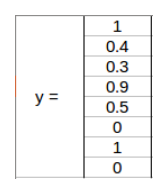

## Intersection over Union and Non-Max Suppression:

how can we decide whether the predicted bounding box is giving us a good outcome (or a bad one)? This is where Intersection over Union comes into the picture. It calculates the intersection over union of the actual bounding box and the predicted bonding box. Consider the actual and predicted bounding boxes for a car as shown below:



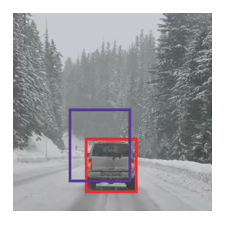

Here, the red box is the actual bounding box and the blue box is the predicted one. How can we decide whether it is a good prediction or not? IoU, or Intersection over Union, will calculate the area of the intersection over union of these two boxes. That area will be:

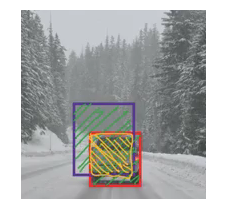

IoU = Area of the intersection / Area of the union, i.e.

IoU = Area of yellow box / Area of green box

If IoU is greater than 0.5, we can say that the prediction is good enough. 0.5 is an arbitrary threshold we have taken here, but it can be changed according to your specific problem. Intuitively, the more you increase the threshold, the better the predictions become.

Non-Max Suppression: we use when we have more prediction boxes or multiple boxes

it will calculate iou and remove the boxes which less prob than the other onw which havw high prob until it have one bounding box which have highest prob

## Non-Max suppression algorithm:




```
1.Discard all the boxes having probabilities less than or equal to a pre-defined threshold (say, 0.5)
2.For the remaining boxes:
     1.Pick the box with the highest probability and take
       that as the output prediction

     2 Discard any other box which has IoU greater than the threshold
     with the output box from the above step
3. Repeat step 2 until all the boxes are either taken as the output prediction or discarded
```







## Let's mount google drive first for a storage and GPU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
# make sure you use Tesla K80 GPU (12GB), by changing 'runtime type'
!nvidia-smi

## Clone Darknet GitHub repository

In [ ]:
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/

Install gcc compiler for building OpenCV using the command

In [ ]:
!apt install gcc-5 g++-5 -y
!ln -s /usr/bin/gcc-5 /usr/local/cuda/bin/gcc
!ln -s /usr/bin/g++-5 /usr/local/cuda/bin/g++

## Go to the darknet folder, enable GPU, then compile the entire thing

In [ ]:
%cd darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!make

## Get the YOLO Weights file

In [ ]:
#webget is a command in linux to get the content from web
#chmod it is change mode a+x means make it executablefile

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights
!chmod a+x ./darknet

## To get the working Directory

In [ ]:
!pwd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Numpy is needed for OpenCV as a dependency and can be downloaded for python3 with command

In [ ]:
!apt install ffmpeg libopencv-dev libgtk-3-dev python-numpy python3-numpy libdc1394-22 libdc1394-22-dev libjpeg-dev libtiff5-dev libavcodec-dev libavformat-dev libswscale-dev libxine2-dev libgstreamer1.0-dev libgstreamer-plugins-base1.0-dev libv4l-dev libtbb-dev qtbase5-dev libfaac-dev libmp3lame-dev libopencore-amrnb-dev libopencore-amrwb-dev libtheora-dev libvorbis-dev libxvidcore-dev x264 v4l-utils unzip

## It's time to upload the video

In [ ]:
from google.colab import files

uploaded = files.upload()

To run your YOLOv3 custom object detector now:

./darknet detector demo
** < path to obj data > < path to custom config > < weight file > < path to video.mp4 >**

In [ ]:
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show test_video.mp4 -i 0 -out_filename output1.avi -thresh 0.7

In [ ]:
from google.colab import files
files.download('/content/darknet/output1.avi')